# Name : Joseph Sako .

>

# Project 1 for Data Mining .

In [59]:
# Part ( 1 ) ...

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [60]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**myObservations :**

>

*   The average BMI is approximately 29 . A BMI of 29 falls in the overweight category according to the World Health Organization (WHO) classification .
*   Of all patients recorded in the dataset , the oldest aged individuals are 82 years old . This may be identified via the *max* row and *age* column .
*   The hypertension , heart_disease , and stroke attributes are 0 for the 25% , 50% , and 75% titles . From this information , we may conclude that more patients had not encountered them .
*   The count title indicates 5110.000000 for each attribute other than for BMI which is 4909.000000 .
*   The lowest recorded average glucose level rounds to 55 . This is lower than the normal range , which is typically between 70 and 99 .

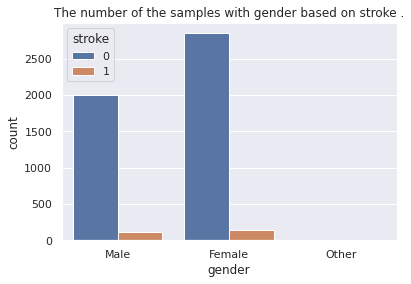

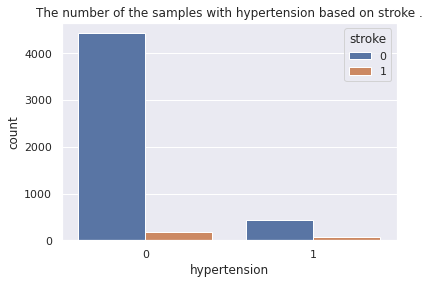

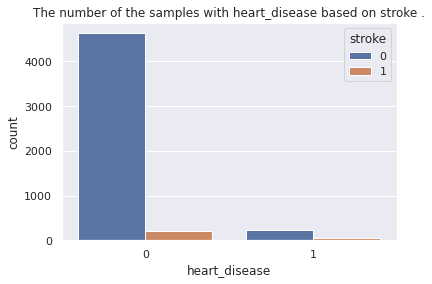

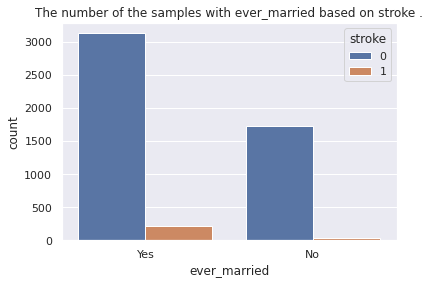

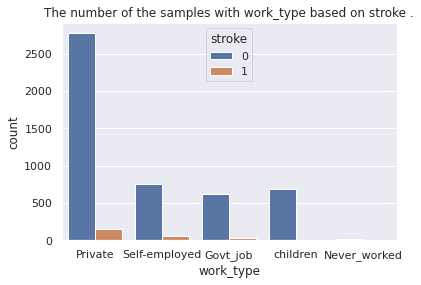

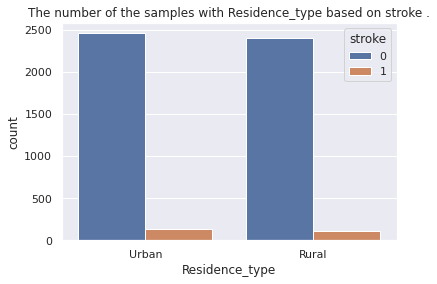

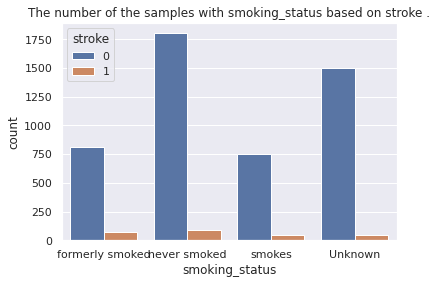

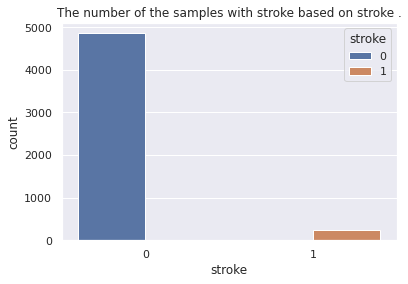

In [61]:
# Part ( 2 ) ...

for i in stroke_data.columns[1:]:
  if (stroke_data[i].dtype == 'object') or (stroke_data[i].dtype == 'int64'):
    sns.countplot(data = stroke_data, x = i, hue = 'stroke')
    plt.title('The number of the samples with {} based on stroke .'.format(i))
    plt.show()

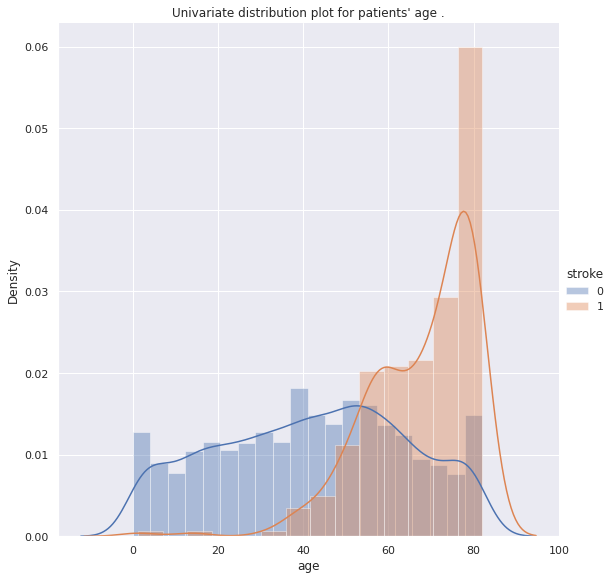

In [62]:
# Part ( 3 ) ...

sns.set(rc = {'figure.figsize':(18,10)})
sns.FacetGrid(stroke_data, hue = 'stroke', height = 8).map(sns.distplot, "age").add_legend()
plt.title("Univariate distribution plot for patients' age .")
plt.show()

**Description of Results :**

>

It may be concluded here that the likelyhood of a stroke occuring increases as does age .

Text(0, 0.5, 'Age of Patient')

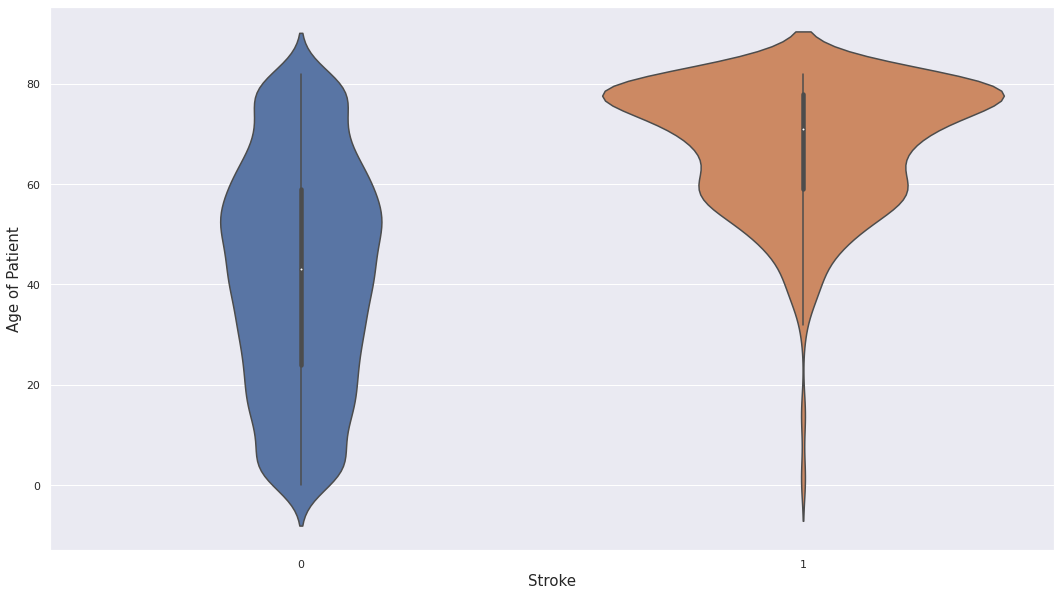

In [63]:
# Part ( 4 ) ...

sns.set(rc = {'figure.figsize':(18,10)})
seaborn_plot = sns.violinplot(x = 'stroke', y = 'age', data = stroke_data)
seaborn_plot.set_xlabel("Stroke", fontsize = 15)
seaborn_plot.set_ylabel("Age of Patient", fontsize = 15)

It may be concluded here that the likelyhood of a stroke occuring is at its peak when the age of the patient ranges from 75 to 80 years old .

In [64]:
# Part ( 5 ) ...

Based on what is seen of the number of individuals who have and have not had a stroke , it seems as though this dataset may be imbalanced . This is evident by the miniscule range in age associated to those who are more likely to have a stroke .

Text(0.5, 1.0, 'Correlation Heatmap')

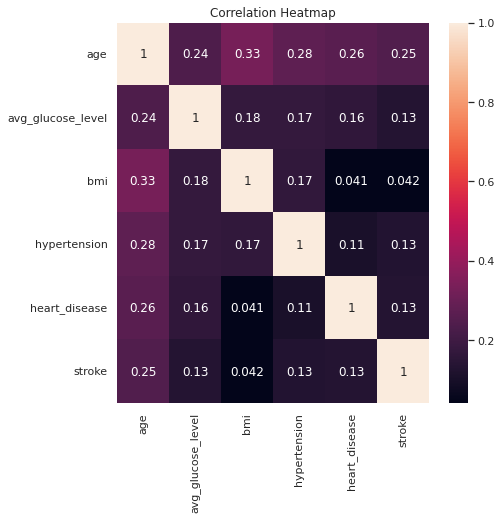

In [65]:
# Part ( 6 ) ...

fig, ax = plt.subplots(figsize = (7, 7))
heatmap = sns.heatmap(stroke_data[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr(), vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap')

In [66]:
stroke_data[1:].corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003806,0.003467,-0.000233,0.001782,0.003352,0.007527
age,0.003806,1.000000,0.276498,0.263415,0.237810,0.333256,0.244843
hypertension,0.003467,0.276498,1.000000,0.108763,0.174775,0.167892,0.128435
heart_disease,-0.000233,0.263415,0.108763,1.000000,0.160030,0.040565,0.131772
avg_glucose_level,0.001782,0.237810,0.174775,0.160030,1.000000,0.175102,0.129946
bmi,0.003352,0.333256,0.167892,0.040565,0.175102,1.000000,0.041525
stroke,0.007527,0.244843,0.128435,0.131772,0.129946,0.041525,1.000000


Based on the definition of when things are positively correlated , or not correlated , the variables that have the strongest correlation are age and BMI . It may also be noted that age , avg_glucose_level , BMI , hypertension , and heart_disease have a strong correlation as well .

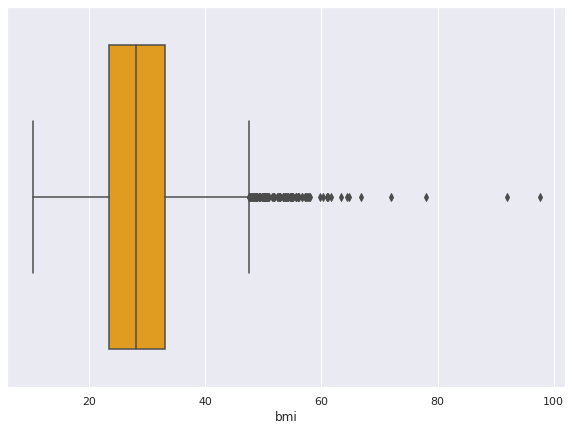

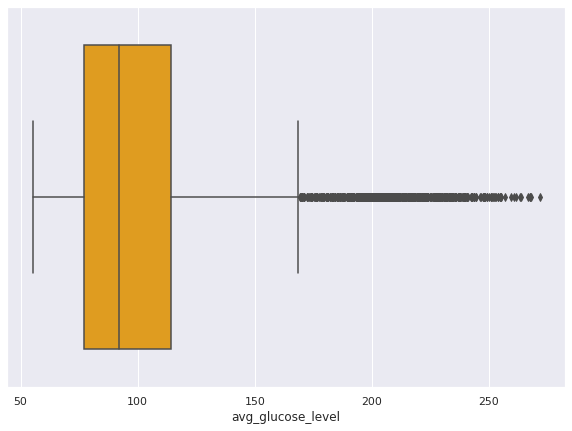

In [67]:
# Part ( 7 , 8 , 9 ) ...

plt.figure(figsize = (10,7))
sns.boxplot(data = stroke_data, x = stroke_data["bmi"], color = 'orange');

plt.figure(figsize = (10,7))
sns.boxplot(data = stroke_data, x = stroke_data["avg_glucose_level"], color = 'orange');

In [68]:
bmi_outliers = stroke_data.loc[stroke_data['bmi'] > 50]
avg_glucose_level = stroke_data.loc[stroke_data['avg_glucose_level'] > 175]

In [69]:
stroke_data["bmi"] = stroke_data["bmi"].apply(lambda x: 50 if x > 50 else x)
stroke_data["avg_glucose_level"] = stroke_data["avg_glucose_level"].apply(lambda x: 175 if x > 175 else x)

In [70]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [71]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].mean())

In [72]:
le = LabelEncoder()
i = 0
for col_name in stroke_data.columns[i:]:
  if (stroke_data[col_name].dtype == 'object'):
    stroke_data[col_name] = le.fit_transform(stroke_data[col_name])

In [73]:
stroke_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,175.00,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,175.00,28.791465,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1


In [76]:
le.inverse_transform(stroke_data['Residence_type'].unique())
np.array(['formerly smoked', 'Unknown'], dtype = object)

array(['formerly smoked', 'Unknown'], dtype=object)